<a href="https://colab.research.google.com/github/ardiusebenezer07/Machine-Learning/blob/main/EDA_Cars_features_datasheet_Ardius_Ebenezer_1103210208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Scikit-learn untuk pemrosesan data dan model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Tahap 1: Memuat dan Memeriksa Dataset
# Baca dataset fitur mobil
data = pd.read_csv('data.csv')

In [4]:
# Tampilkan informasi dasar dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: 

In [5]:
# Tahap 2: Exploratory Data Analysis (EDA)
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.0000

In [6]:
# Cek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())


Cek Missing Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

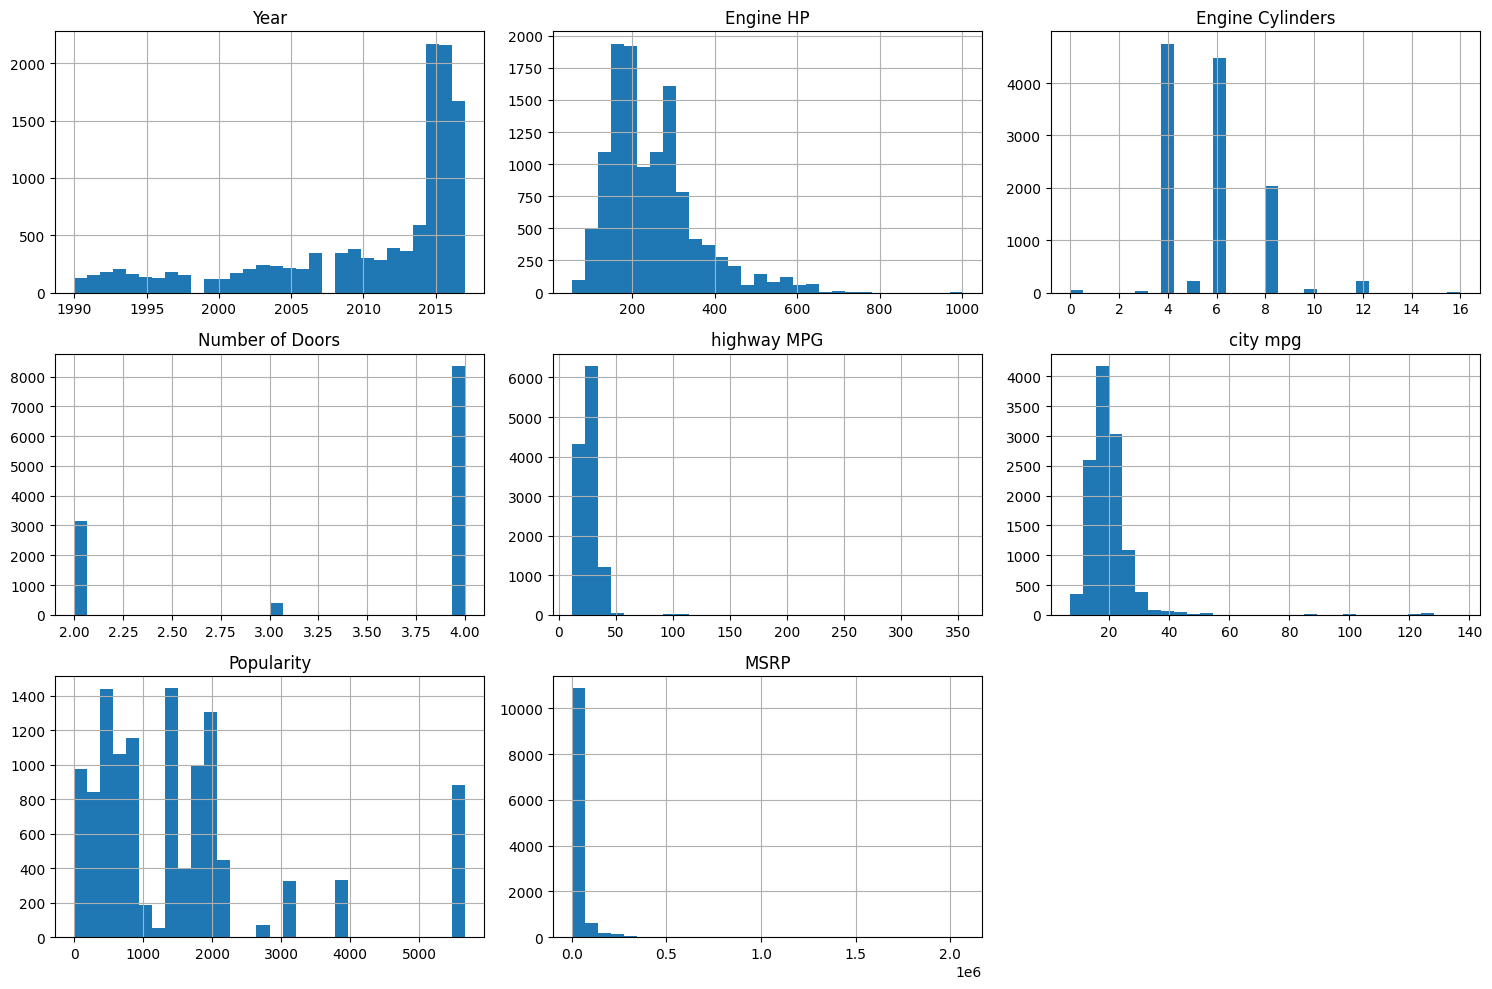

In [7]:
# Visualisasi distribusi variabel
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(12, 10))  # Membuat figure dengan ukuran 12x10 inci
korelasi_fitur = data.corr()  # Menghitung matriks korelasi dari seluruh kolom numerik di dataset
sns.heatmap(  # Membuat heatmap korelasi menggunakan Seaborn
    korelasi,  # Data matriks korelasi
    annot=True,  # Menampilkan nilai korelasi di setiap sel
    cmap='coolwarm',  # Skema warna coolwarm (merah-biru)
    linewidths=0.5  # Lebar garis pemisah antar sel
)
plt.title('korelasi_fitur')  # Judul plot
plt.tight_layout()  # Menyesuaikan tata letak plot
plt.show()  # Menampilkan plot

In [21]:
# Tahap 3: Persiapan Data
# Pilih fitur untuk prediksi harga
features = ['Engine HP', 'Engine Cylinders','city mpg','Popularity','MSRP']
target = 'Year'

In [22]:
# Ubah variabel kategorikal menjadi numerik
data_encoded = pd.get_dummies(data[features + [target]])
# Pisahkan fitur dan target
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

In [23]:
# Bagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Tahap 4: Model Regresi Linear Sederhana
# Pipeline untuk regresi linear sederhana
linear_pipeline = Pipeline([
    ('scaler', StandardScaler),  # Standarisasi fitur
    ('regressor', LinearRegression())  # Regresi linear
])

In [ ]:
# Latih model
linear_pipeline.fit(X_train, y_train)
# Prediksi
y_pred_linear = linear_pipeline.predict(X_test)

In [ ]:
# Evaluasi model linear
print("\nEvaluasi Model Regresi Linear:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R-squared: {r2_score(y_test, y_pred_linear)}")

In [ ]:
# Tahap 5: Model Regresi Linear Polinomial
# Pipeline untuk regresi linear polinomial
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Tambahkan fitur polinomial
    ('scaler', StandardScaler()),  # Standarisasi fitur
    ('regressor', LinearRegression())  # Regresi linear
])

In [ ]:
# Latih model polinomial
poly_pipeline.fit(X_train, y_train)

In [ ]:
# Prediksi
y_pred_poly = poly_pipeline.predict(X_test)

In [ ]:
# Evaluasi model polinomial
print("\nEvaluasi Model Regresi Linear Polinomial:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_poly)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_poly))}")
print(f"R-squared: {r2_score(y_test, y_pred_poly)}")

In [ ]:
# Visualisasi prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Regresi Linear: Prediksi vs Aktual')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Regresi Linear Polinomial: Prediksi vs Aktual')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

In [ ]:
plt.tight_layout()
plt.show()